# Read & Clear Data

In [43]:
import os.path
import numpy as np
import pandas as pd
import feather 
import matplotlib.pyplot as plt  
from time import time
from mailerWithUtf8 import mail

from sklearn.model_selection import train_test_split  
from sklearn import tree  
from sklearn.externals import joblib
from sklearn.datasets import load_breast_cancer 
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


import os

In [2]:
def save_dataframe(df, out_filename):
   # write to csv and no index
    t0 = time()
    df.to_csv(out_filename + ".csv", index=False, encoding='utf-8')
#     df.to_csv(out_filename + ".csv", encoding='utf-8')
    print("time for output csv file: %.2f" % (time()-t0))

In [3]:
start_time = time()
path = "C:/Users/VIPLAB/Desktop/preprocess_py/marketing_analyze/"
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_train.feather' 
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_train.feather' 

train_df = feather.read_dataframe(path + filename)
# df = pd.read_csv(path + filename, error_bad_lines=False, nrows = 10)

print('load feather %s seconds', format(time() - start_time))


load feather %s seconds 2.2551984786987305


In [4]:
# filename = '0713_april_marketing_anylze_full_table_group12_max_min_test.feather' 
filename = '0713_april_marketing_anylze_full_table_group12_select_max_min_test.feather' 
# filename = '0713_april_marketing_anylze_full_table_group12_max_min.feather' 

test_df = feather.read_dataframe(path + filename)
print('load feather %s seconds', format(time() - start_time))

load feather %s seconds 2.8278791904449463


In [5]:
CLASSIFIER = "DECISION"

In [6]:
CURRENT_MODE = "SELECT_MODE"

In [7]:
groups = train_df["Groups"].unique()

In [8]:
groups_idx = 10

In [11]:
target_groups = groups[groups_idx]

In [12]:
out_path = "clf_model/" + target_groups + "/" 

In [13]:
out_filename = CLASSIFIER + "_" + CURRENT_MODE + '_'

In [14]:
if not os.path.exists(out_path):
    os.makedirs(out_path)

# for each group build tree

In [15]:
map_target_groups = []
for group in groups:
    if(group == target_groups):
        map_target_groups.append(group)
    else:
        map_target_groups.append("None")
d = dict(zip(groups, map_target_groups))
train_df["Groups"] = train_df["Groups"].map(d)
test_df["Groups"] = test_df["Groups"].map(d)

In [16]:
train_df.groupby("Groups").count()

,SRV_TYPE_DESC,GENDER_CODE,AGE,TENURE_SCV,BILL_CITY_NAME,DORMANT_MONTH_CNT_MKT,IMEI_MFG_NAME,IMEI_BAND,CHURN_CLM_IND,PTY_NP_IN_IND,...,MOST_MT_DUR,CUST_TYPE,FLAT_RATE_4G_IND,FLAT_RATE_3G_IND,VOICE_MONTHLY_FEE,DATA_MONTHLY_FEE,TOTAL_MONTHLY_FEE,DATA_RATING_USAGE_MB,HS_CHG_CNT,AVG_HS_USE_MONTH
Groups,,,,,,,,,,,,,,,,,,,,,
News,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705,...,45705,45705,45705,45705,45705,45705,45705,45705,45705,45705
None,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,...,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571,1461571


In [17]:
# test_class_count = test_df.groupby("Groups").count()[test_df.columns[0:1]].values.flatten()

In [18]:
train_x, train_y = train_df.iloc[:, 0:-1].values, train_df.iloc[:, -1].values

In [19]:
test_x, test_y = test_df.iloc[:, 0:-1].values, test_df.iloc[:, -1].values

# convert y to numeric

In [20]:
le = preprocessing.LabelEncoder()
le.fit(train_df["Groups"].unique())
train_numeric_y = le.transform(train_y)
test_numeric_y = le.transform(test_y) 

In [21]:
# train_x = train_x.reshape(train_x.shape[0], -1)   # normalize

In [22]:
# test_x = test_x.reshape(test_x.shape[0], -1)   # normalize

In [23]:
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(train_y)
# encoded_Y = encoder.transform(train_y)
# # convert integers to dummy variables (i.e. one hot encoded)
# train_y = np_utils.to_categorical(encoded_Y)


In [24]:
# encoded_Y = encoder.transform(test_y)
# # convert integers to dummy variables (i.e. one hot encoded)
# test_y = np_utils.to_categorical(encoded_Y)

In [25]:
# get y unique name
# encoder.classes_

# build Classifier

In [26]:
clf = tree.DecisionTreeClassifier(random_state=0,
                              max_features = "sqrt",
                             )  


In [27]:
start_time = time()
clf.fit(train_x, train_numeric_y)  




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

#  saving classifier

In [1089]:
joblib.dump(clf, out_path + out_filename + 'CLF.pkl') 
# clf = joblib.load('filename.pkl') 


['clf_model/News/DECISION_SELECT_MODE_CLF.pkl']

In [28]:
clf_info = str(("Accuracy on training set: %f" % clf.score(train_x, train_numeric_y))) + '\n'
clf_info += str(("Accuracy on test set: %f" % clf.score(test_x, test_numeric_y))) + '\n'
clf_info += str(('fit time %s seconds' % format(time() - start_time))) + '\n'
print(clf_info)

Accuracy on training set: 1.000000
Accuracy on test set: 0.935561
fit time 24.575088024139404 seconds



In [45]:
predict_y = clf.predict(test_x)

In [46]:
predict_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
test_numeric_y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

# get feature importances

In [31]:
important_dict = dict(zip(train_df.columns[:-1], clf.feature_importances_))

In [32]:
important_dict

{'AGE': 0.027963329861502684,
 'AGENCY_AMT': 0.0084534860758931057,
 'AVG_HS_USE_MONTH': 0.020012733030645151,
 'BILL_CITY_NAME': 0.018469504560103361,
 'CHURN_CLM_IND': 0.0050016044175015721,
 'CURR_PROM_COMMIT_MONTHS': 0.0049150535554468066,
 'CUST_TYPE': 0.0006348962272323533,
 'DATA_INV_AMT': 0.015286038485594868,
 'DATA_MONTHLY_FEE': 0.0059022605218159311,
 'DATA_RATING_USAGE_MB': 0.034675138624943633,
 'DATA_RC_AMT': 0.010214166548778859,
 'DORMANT_MONTH_CNT_MKT': 0.0,
 'FLAT_RATE_3G_IND': 0.0013072159441861362,
 'FLAT_RATE_4G_IND': 0.0021204645394658547,
 'GENDER_CODE': 0.0017216472538711931,
 'GOOGLE_PLAY_IND': 0.001461630916164949,
 'HS_CHG_CNT': 0.010823932359372393,
 'IDD_AMT': 0.0015876431181707023,
 'IMEI_BAND': 0.0031955783244303161,
 'IMEI_MFG_NAME': 0.017667555081264445,
 'INT_ROAM_AMT': 0.00096994554669673459,
 'L1M_NET_INV_AMT': 0.022206356160931886,
 'L1M_PROM_COMMIT_MONTHS': 0.0042444414431272934,
 'L2M_NET_INV_AMT': 0.023575939866926375,
 'L3M_AVG_NET_INV_AMT': 0.0

In [33]:
important_list = sorted(important_dict.items(), key=lambda x: x[1])

In [34]:
important_list.reverse()

In [35]:
clf_info += '\n\nFeature Importances\n===================\n'
for row in important_list:
    clf_info += str(row) + "\n"
    print(str(row))

('DATA_RATING_USAGE_MB', 0.034675138624943633)
('TENURE_SCV', 0.031537563728368773)
('AGE', 0.027963329861502684)
('MOST_MT_DUR', 0.024841486868821504)
('MO_TTL_DURATION', 0.0247685654143299)
('MOST_MO_DUR', 0.024746318147141254)
('L3M_AVG_NET_INV_AMT', 0.023620442954530599)
('L2M_NET_INV_AMT', 0.023575939866926375)
('MT_STM_AMT', 0.023121640930431189)
('L3M_NET_INV_AMT', 0.0231174598752357)
('MT_TTL_DURATION', 0.023017315739108288)
('MT_OFFNET_DUR', 0.022887317997769871)
('PROM_CURR_EXP_MONTH_CNT', 0.022454082376143669)
('L1M_NET_INV_AMT', 0.022206356160931886)
('NET_INV_AMT', 0.021987099775637991)
('MT_ONNET_DUR', 0.021449844942058923)
('MTC_CHM_DUR', 0.021292731832429777)
('MO_OFFNET_DUR', 0.021139392478416209)
('MT_TTL_COUNT', 0.020206807932365612)
('MTC_FET_DUR', 0.020167942271071933)
('AVG_HS_USE_MONTH', 0.020012733030645151)
('MO_TTL_COUNT', 0.019932475750257365)
('MOC_CHM_DUR', 0.019742838609746023)
('MOC_FET_DUR', 0.019553179158314116)
('MO_ONNET_DUR', 0.018911437361134403)
('

In [36]:
feature_df = pd.DataFrame(important_list, columns = ["COLUMN", "IMPORTANT_VALUE"])

In [37]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important_descent.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

time for output csv file: 0.00


In [38]:
cpy_dict = dict(important_list)
cpy_dict["Groups"] = target_groups
feature_df = pd.DataFrame(cpy_dict, index = [0])

In [39]:
t0 = time()
feature_df.to_csv(out_path + out_filename + "feature_important_one_row.csv", index=False)
print("time for output csv file: %.2f" % (time()-t0))

time for output csv file: 0.00


In [40]:
clf.n_classes_

2

In [41]:
clf.n_outputs_

1

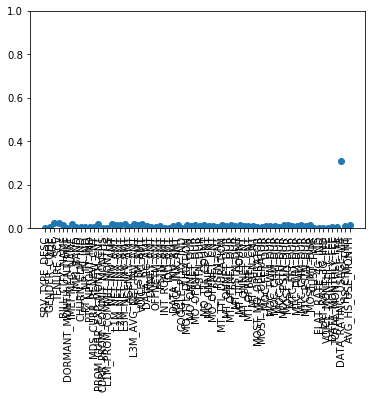

In [944]:
plt.plot(clf.feature_importances_, 'o')  
# for i in 
plt.xticks(range(train_x.shape[1]), train_df.columns[:-1], rotation=90)  
plt.ylim(0, 1)  
plt.show()  

In [47]:
cnf_matrix = confusion_matrix(test_numeric_y, predict_y )
cnf_matrix

array([[   631,  10838],
       [ 13444, 351906]])

In [48]:
for idx, row in enumerate(cnf_matrix):
#     success predict
#     print(row[idx])
    current_group = str(le.inverse_transform(idx))
    print(current_group)

    idx_count_in_group = len(test_df[test_df["Groups"] == current_group])
    clf_info +=  "\n\n" + str("class = %s count = [%s / %s]" % (current_group, row[idx], idx_count_in_group))
    clf_info +=  "\n\n" + str("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print("class = %s count = [%s / %s]" % (current_group,row[idx],str(idx_count_in_group)))
    print("predict %s accurancy = %s" % (current_group, row[idx] / idx_count_in_group))
    print()

News
class = News count = [631 / 11469]
predict News accurancy = 0.0550178742698

None
class = None count = [351906 / 365350]
predict None accurancy = 0.963202408649



In [1104]:
md_info = clf_info.replace("\n", "<br>")
with open(out_path + out_filename + 'readme.md', 'w+') as f:
     f.write(md_info)
f.closed

True

In [945]:
test=mail()
test.main("decision tree finished", "spend time = " + str(time() - start_time))

Start Send Mail
User Email : a - DONE 
User Email : a - DONE 
User Email : 2 - DONE 
User Email : 6 - DONE 
User Email : 3 - DONE 
User Email : 6 - DONE 
User Email : 5 - DONE 
User Email : 5 - DONE 
User Email : 6 - DONE 
User Email : 6 - DONE 
User Email : @ - DONE 
User Email : g - DONE 
User Email : m - DONE 
User Email : a - DONE 
User Email : i - DONE 
User Email : l - DONE 
User Email : . - DONE 
User Email : c - DONE 
User Email : o - DONE 
User Email : m - DONE 
Finish Send Mail
